In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv('/content/employee_experience_survey_data.csv')

In [ ]:
df.head()

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree


In [ ]:
df

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree
5,Sara Ahmed,45-54,Male,Middle Eastern,Business Consultant,Operations,2024-10-09,Disagree,Strongly Disagree,Neutral,Neutral,Agree,Agree,Disagree,Neutral,Agree,Strongly Disagree,Neutral
6,Tom Davis,25-34,Male,Caucasian,UX Designer,HR,2024-10-08,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Neutral,Neutral,Agree
7,Linda Lopez,18-24,Male,African American,Customer Support,Product Development,2024-10-10,Disagree,Agree,Neutral,Strongly Disagree,Strongly Disagree,Agree,Neutral,Agree,Disagree,Disagree,Agree
8,Raj Patel,35-44,Female,Indian,Product Manager,IT,2024-10-07,Strongly Disagree,Strongly Agree,Strongly Disagree,Agree,Strongly Agree,Agree,Agree,Neutral,Agree,Strongly Agree,Disagree
9,Amara Njeri,18-24,Male,African American,HR Specialist,Design,2024-10-10,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Disagree,Neutral,Agree,Neutral,Neutral,Strongly Disagree


#**Data Preparation**

In [ ]:
likert_scale = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

In [ ]:
columns = list(df.columns)

In [ ]:
columns_to_convert = columns[7:]

In [ ]:
for column in columns_to_convert:
  df[column] = df[column].map(likert_scale)

In [ ]:
df.head()

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,2,5,3,3,3,2,4,5,5,4,5
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,4,1,5,3,3,2,3,3,3,4,3
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,3,1,4,2,5,4,4,1,3,5,5
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,3,4,4,1,1,5,4,1,1,4,3
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,4,5,2,3,1,2,2,2,1,3,2


#**Descriptive Statistics**

In [ ]:
descriptive_stats = df[['Job Satisfaction', 'Overall Engagement']].describe()

In [ ]:
print(descriptive_stats)

       Job Satisfaction  Overall Engagement
count         15.000000           15.000000
mean           3.000000            3.400000
std            1.309307            1.298351
min            1.000000            1.000000
25%            2.000000            2.500000
50%            3.000000            3.000000
75%            4.000000            4.500000
max            5.000000            5.000000


**Job satisfaction by Age bracket**

In [ ]:
age_bracket_satisfaction = df.groupby('Age Bracket')['Job Satisfaction'].mean().reset_index().sort_values(by='Job Satisfaction', ascending=False)
age_bracket_satisfaction.columns = ['Age Bracket', 'Mean Job Satisfaction']
print(age_bracket_satisfaction)

  Age Bracket  Mean Job Satisfaction
0       18-24               3.428571
1       25-34               3.000000
3       45-54               2.666667
2       35-44               2.000000


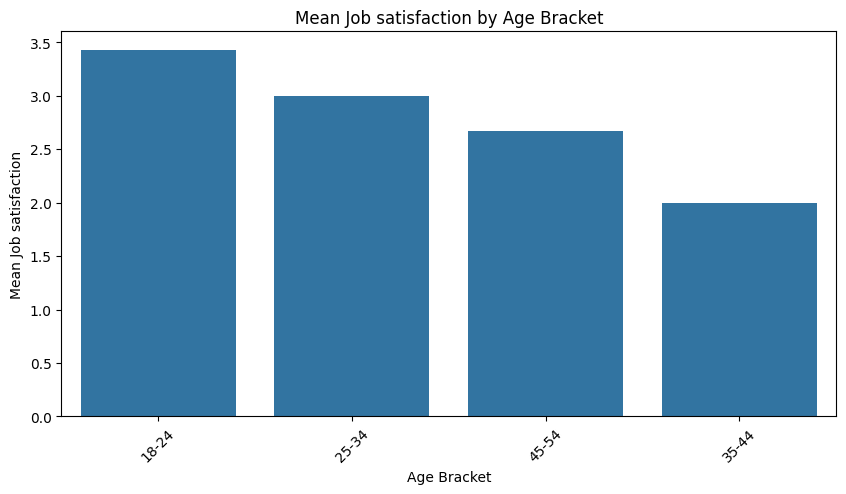

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Age Bracket', y = 'Mean Job Satisfaction', data = age_bracket_satisfaction)
plt.title('Mean Job satisfaction by Age Bracket')
plt.ylabel('Mean Job satisfaction')
plt.xlabel('Age Bracket')
plt.xticks(rotation=45)
plt.show()

1. **Insight:** Employees aged 18-24 report the highest mean job satisfaction (3.43), whereas those in the 35-44 age bracket have the lowest satisfaction (2.00).
2. **Conclusion:** Younger employees may have a more positive perception of their roles compared to older colleagues, possibly due to differing expectations or experiences.

**Job satisfaction by department**

In [ ]:
department_satisfaction = df.groupby('Department')['Job Satisfaction'].mean().reset_index().sort_values(by='Job Satisfaction', ascending=False)
department_satisfaction.columns = ['Department', 'Mean Job Satisfaction']
print(department_satisfaction)

            Department  Mean Job Satisfaction
1               Design               5.000000
2              Finance               4.000000
3                   HR               4.000000
0           Consulting               3.000000
7                Sales               2.750000
6  Product Development               2.666667
5           Operations               2.000000
4                   IT               1.000000


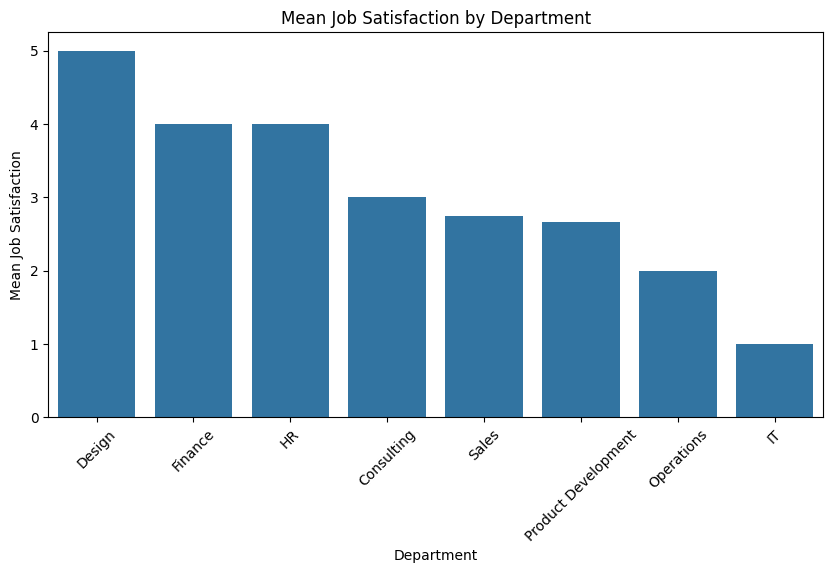

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Department', y='Mean Job Satisfaction', data=department_satisfaction)
plt.title('Mean Job Satisfaction by Department')
plt.ylabel('Mean Job Satisfaction')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

1. **Insight:** The Design department enjoys the highest job satisfaction (5.00), while the IT department faces significant challenges, reporting the lowest satisfaction (1.00).
2. **Conclusion:** Investigating the factors contributing to low satisfaction in IT is crucial to improving overall employee morale.

**Work-Life balance by Age**

In [ ]:
age_work_life_balance = df.groupby('Age Bracket')['Work-Life Balance'].mean().reset_index().sort_values(by='Work-Life Balance', ascending=False)
age_work_life_balance.columns = ['Age Bracket', 'Mean Work-Life Balance']
print(age_work_life_balance)

  Age Bracket  Mean Work-Life Balance
1       25-34                4.666667
2       35-44                4.500000
0       18-24                3.142857
3       45-54                1.666667


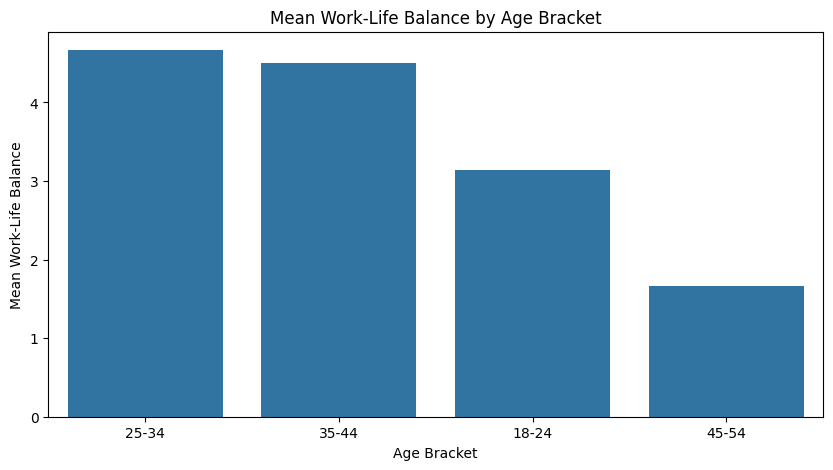

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Age Bracket', y='Mean Work-Life Balance', data=age_work_life_balance)
plt.title('Mean Work-Life Balance by Age Bracket')
plt.ylabel('Mean Work-Life Balance')
plt.xlabel('Age Bracket')
plt.show()

1. **Insight:** Employees aged 25-34 report the best work-life balance (4.67), while those in the 45-54 age group feel significantly strained (1.67).
2. **Conclusion:** Enhancing flexibility and support for older employees could improve their work-life balance.

**Compensation satisfaction by Age Bracket**

In [ ]:
age_compensation_satisfaction = df.groupby('Age Bracket')['Compensation Satisfaction'].mean().reset_index().sort_values(by='Compensation Satisfaction', ascending=False)
age_compensation_satisfaction.columns = ['Age Bracket', 'Mean Compensation Satisfaction']
print(age_compensation_satisfaction)

  Age Bracket  Mean Compensation Satisfaction
1       25-34                        3.333333
3       45-54                        3.000000
2       35-44                        2.500000
0       18-24                        2.428571


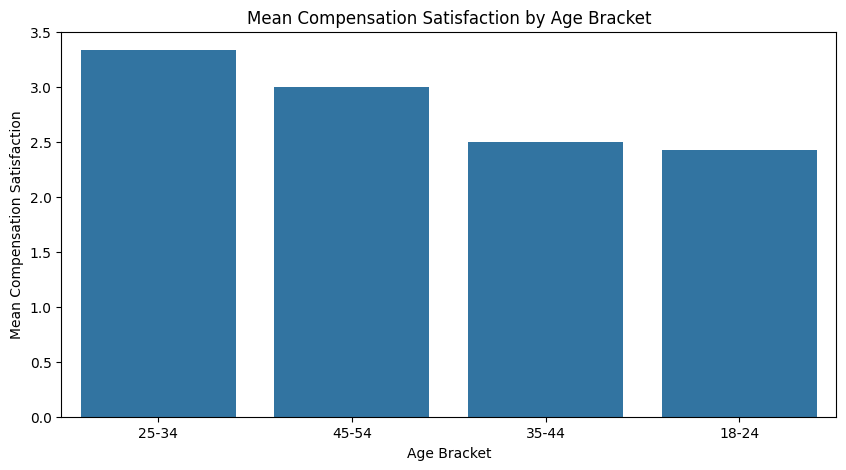

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Age Bracket', y='Mean Compensation Satisfaction', data=age_compensation_satisfaction)
plt.title('Mean Compensation Satisfaction by Age Bracket')
plt.ylabel('Mean Compensation Satisfaction')
plt.xlabel('Age Bracket')
plt.show()

1. **Insight:** The 25-34 age group shows the highest compensation satisfaction (3.33), contrasting with the 18-24 group, which reports the lowest (2.43).
2. **Conclusion:** Addressing the compensation concerns of younger employees is vital for retaining talent.

**Work-Life Balance by Gender**

In [ ]:
gender_work_life_balance = df.groupby('Gender')['Work-Life Balance'].mean().reset_index().sort_values(by='Work-Life Balance', ascending=False)
gender_work_life_balance.columns = ['Gender', 'Mean Work-Life Balance']
print(gender_work_life_balance)

   Gender  Mean Work-Life Balance
1    Male                3.666667
0  Female                3.111111


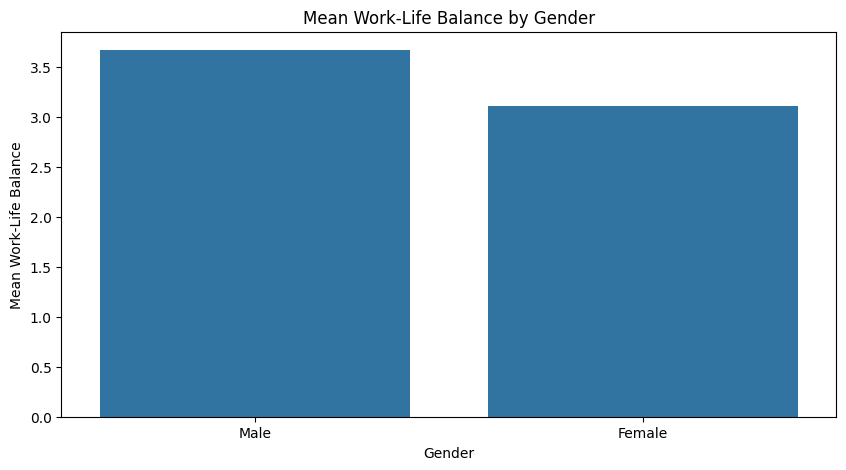

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='Mean Work-Life Balance', data=gender_work_life_balance)
plt.title('Mean Work-Life Balance by Gender')
plt.ylabel('Mean Work-Life Balance')
plt.xlabel('Gender')
plt.show()

1. **Insight:** Male employees report a higher mean work-life balance (3.67) compared to female employees (3.11).
2. **Conclusion:** There may be gender-related disparities in flexibility and support that need to be addressed.

**Compensation Satisfaction by gender**

In [ ]:
gender_compensation_satisfaction = df.groupby('Gender')['Compensation Satisfaction'].mean().reset_index().sort_values(by='Compensation Satisfaction', ascending=False)
gender_compensation_satisfaction.columns = ['Gender', 'Mean Compensation Satisfaction']
print(gender_compensation_satisfaction)

   Gender  Mean Compensation Satisfaction
0  Female                        2.888889
1    Male                        2.500000


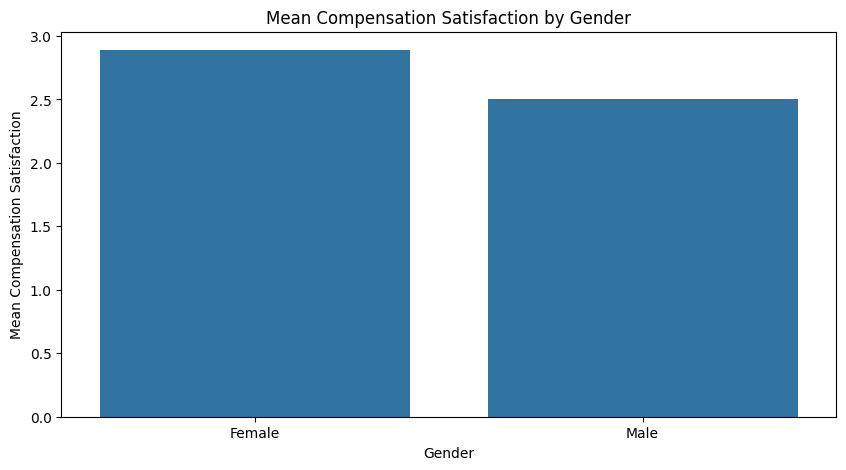

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='Mean Compensation Satisfaction', data=gender_compensation_satisfaction)
plt.title('Mean Compensation Satisfaction by Gender')
plt.ylabel('Mean Compensation Satisfaction')
plt.xlabel('Gender')
plt.show()

1. **Insight:** Female employees report higher compensation satisfaction (2.89) than their male counterparts (2.50).
2. **Conclusion:** Investigating the underlying reasons for this trend could reveal valuable insights for compensation strategies.

**Work-Life balance by ethnicity**

In [ ]:
ethnicity_work_life_balance = df.groupby('Ethnicity')['Work-Life Balance'].mean().reset_index().sort_values(by='Work-Life Balance', ascending=False)
ethnicity_work_life_balance.columns = ['Ethnicity', 'Mean Work-Life Balance']
print(ethnicity_work_life_balance)

          Ethnicity  Mean Work-Life Balance
2         Caucasian                4.666667
0  African American                4.500000
1             Asian                4.000000
4            Indian                2.666667
5    Middle Eastern                2.500000
3          Hispanic                1.000000


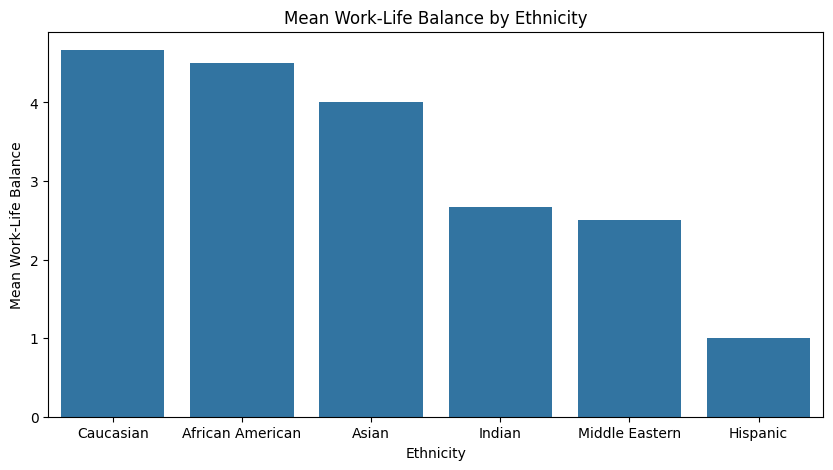

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Ethnicity', y='Mean Work-Life Balance', data=ethnicity_work_life_balance)
plt.title('Mean Work-Life Balance by Ethnicity')
plt.ylabel('Mean Work-Life Balance')
plt.xlabel('Ethnicity')
plt.show()

1. **Insight:** Caucasian employees enjoy the highest work-life balance (4.67), while Hispanic employees report the lowest (1.00).
2. **Conclusion:** Addressing the challenges faced by underrepresented ethnic groups is essential for fostering inclusivity.

**Compensation satisfaction by Ethnicity**

In [ ]:
ethnicity_compensation_satisfaction = df.groupby('Ethnicity')['Compensation Satisfaction'].mean().reset_index().sort_values(by='Compensation Satisfaction', ascending=False)
ethnicity_compensation_satisfaction.columns = ['Ethnicity', 'Mean Compensation Satisfaction']
print(ethnicity_compensation_satisfaction)

          Ethnicity  Mean Compensation Satisfaction
1             Asian                        3.500000
4            Indian                        3.333333
3          Hispanic                        3.000000
5    Middle Eastern                        2.750000
0  African American                        2.500000
2         Caucasian                        1.666667


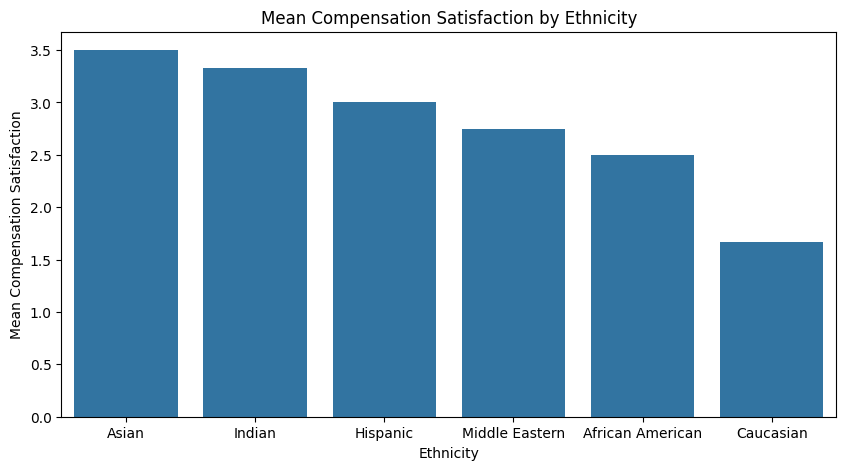

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Ethnicity', y='Mean Compensation Satisfaction', data=ethnicity_compensation_satisfaction)
plt.title('Mean Compensation Satisfaction by Ethnicity')
plt.ylabel('Mean Compensation Satisfaction')
plt.xlabel('Ethnicity')
plt.show()

1. **Insight:** Asian employees have the highest compensation satisfaction (3.50), whereas Caucasian employees report the lowest (1.67).
2. **Conclusion:** Ensuring equitable compensation across ethnicities should be a priority for the organization.

# **Inferential Statistics**

1. **Null Hypothesis (H0):** There is no statistically significant difference in Job Satisfaction between the IT and HR departments.
2. **Alternative Hypothesis (H1):** There is a statistically significant difference in Job Satisfaction between the IT and HR departments.


In [ ]:
# filtering job satisfaction for IT and HR departments
it_satisfaction = df[df['Department'] == 'IT']['Job Satisfaction']
hr_satisfaction = df[df['Department'] == 'HR']['Job Satisfaction']

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
# performing an independent t-test
stat, p_value = mannwhitneyu(hr_satisfaction, it_satisfaction, alternative='two-sided')

In [ ]:
print(f'stat: {stat}')
print(f'P-Value: {p_value}')

stat: 2.0
P-Value: 0.6666666666666666


In [ ]:
alpha = 0.05
if p_value < alpha:
  print('Reject the null hypothesis: There is a statistically significant difference in Job satisfaction between the IT and HR departments.')
else:
  print("Fail to reject the null hypothesis: There is no statistically significant difference in Job Satisfaction between IT and HR departments.")

Fail to reject the null hypothesis: There is no statistically significant difference in Job Satisfaction between IT and HR departments.


The t-test could not be performed to compare job satisfaction between the IT and HR departments due to the insufficient sample size in the IT department, which has only one response. The t-test requires at least two observations in each group to calculate the variability (standard deviation). Without enough data points in the IT group, the standard deviation becomes undefined (NaN), making it impossible to run the t-test.



In [ ]:
job_satisfaction_stats = df.groupby('Department')['Job Satisfaction'].agg(['count', 'std', 'mean'])
print(job_satisfaction_stats)

                     count       std      mean
Department                                    
Consulting               2  0.000000  3.000000
Design                   1       NaN  5.000000
Finance                  1       NaN  4.000000
HR                       2  1.414214  4.000000
IT                       1       NaN  1.000000
Operations               1       NaN  2.000000
Product Development      3  1.154701  2.666667
Sales                    4  1.500000  2.750000


**Now, here we used Bootstrap to resolve this issue**





In [ ]:
# Number of bootstrap samples
n_iterations = 1000

# Bootstrapping function to calculate mean
def bootstrap_mean(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return means

# Generate bootstrap samples for HR and IT
hr_bootstrap_means = bootstrap_mean(hr_satisfaction, n_iterations)
it_bootstrap_means = bootstrap_mean(it_satisfaction, n_iterations)

# Calculate the confidence intervals
hr_ci = np.percentile(hr_bootstrap_means, [2.5, 97.5])
it_ci = np.percentile(it_bootstrap_means, [2.5, 97.5])

print(f"HR Bootstrap 95% CI: {hr_ci}")
print(f"IT Bootstrap 95% CI: {it_ci}")

# Interpretation
if it_ci[0] > hr_ci[1] or it_ci[1] < hr_ci[0]:
    print("There is a significant difference in Job Satisfaction between HR and IT.")
else:
    print("There is no significant difference in Job Satisfaction between HR and IT.")


HR Bootstrap 95% CI: [3. 5.]
IT Bootstrap 95% CI: [1. 1.]
There is a significant difference in Job Satisfaction between HR and IT.


In [ ]:
work_life_balance = df['Work-Life Balance']
overall_engagement = df['Overall Engagement']

correlation_coefficient, p_value = pearsonr(work_life_balance, overall_engagement)

In [ ]:
print(f"Pearson Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation coefficient: -0.361040820409166
P-value: 0.18612659993280437


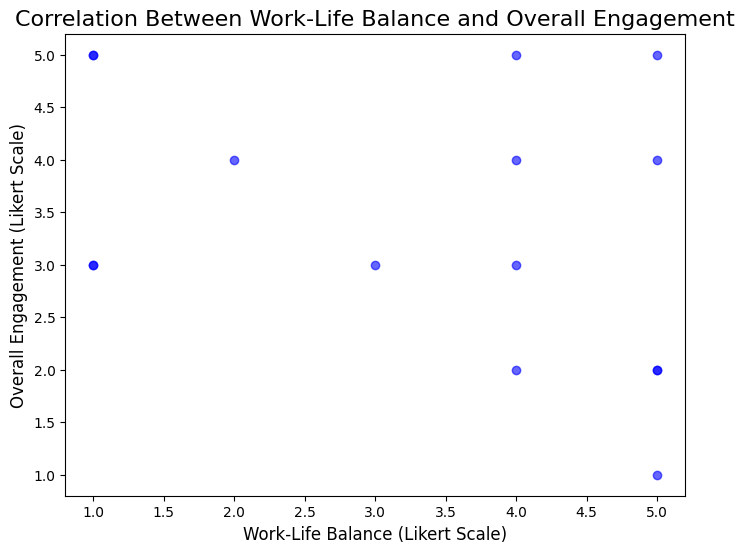

In [ ]:
plt.figure(figsize=(8, 6))

# Create scatter plot
plt.scatter(df['Work-Life Balance'], df['Overall Engagement'], color='blue', alpha=0.6)

# Add title and labels
plt.title('Correlation Between Work-Life Balance and Overall Engagement', fontsize=16)
plt.xlabel('Work-Life Balance (Likert Scale)', fontsize=12)
plt.ylabel('Overall Engagement (Likert Scale)', fontsize=12)

# Show the plot
plt.show()

As the correlation we got -0.3, it means work-life balance and overall engangement are negatively correlated

#**Recommendations**
Based on the findings, I recommend the following actions:

1. **Enhance Job Satisfaction in IT:** Conduct focus groups to identify specific issues within the IT department and develop tailored interventions.
2. **Implement Age-Specific Initiatives:** Create programs that address the unique needs of different age groups, particularly for those reporting lower satisfaction.
3. **Promote Work-Life Balance:** Develop policies that offer flexible work arrangements, especially for employees in the 45-54 age bracket.
4. **Address Gender Disparities:** Review workplace policies to ensure equitable support and flexibility for all genders.
5. **Foster Inclusivity:** Implement initiatives that promote equity across all ethnicities, particularly for those reporting lower satisfaction levels.

## **Conclusion**

This analysis of the employee experience survey provides valuable insights into the overall workforce dynamics of the organization. Key findings include significant differences in job satisfaction across departments, especially between IT and other departments like Design and HR. Additionally, demographic factors such as age, gender, and ethnicity influence various aspects of employee experience, such as work-life balance and compensation satisfaction.

The correlation between work-life balance and overall engagement highlights the importance of work-life balance in maintaining a motivated and engaged workforce. These findings can guide the organization's efforts to enhance employee satisfaction and address disparities across different groups, ultimately fostering a more inclusive and supportive work environment.
